finding best parameters for the model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
boston_df=pd.read_csv('C:\\Users\\harsh\\Desktop\\boston_house_prices.csv')

In [3]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
x_df=boston_df.drop(columns='MEDV')

In [5]:
y_df=boston_df.MEDV

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.2,random_state=0,shuffle=True)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scale=MinMaxScaler(feature_range=(0,1))

In [10]:
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)
y_train=np.array(y_train).reshape(-1,1)
y_train=scale.fit_transform(y_train)


In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
# for optimisation of our model

In [12]:
parameters={'kernel':['rbf','linear'],'gamma':[1,0.1,0.01]}

In [13]:
grid=GridSearchCV(SVR(),parameters,refit=True,verbose=2,scoring='neg_mean_squared_error')

In [16]:
grid.fit(x_df,y_df)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............................gamma=1, kernel=linear; total time=   1.7s
[CV] END .............................gamma=1, kernel=linear; total time=   1.9s
[CV] END .............................gamma=1, kernel=linear; total time=   1.6s
[CV] END .............................gamma=1, kernel=linear; total time=   2.6s
[CV] END .............................gamma=1, kernel=linear; total time=   1.5s
[CV] END ..............................gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............................gamma=0.1,

GridSearchCV(estimator=SVR(),
             param_grid={'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=2)

In [17]:
best_parameters=grid.best_params_

In [18]:
best_parameters

{'gamma': 1, 'kernel': 'linear'}

In [24]:
iris_df=pd.read_csv('C:\\Users\\harsh\\Desktop\\iris.csv')

iris_df.rename(columns={'150':'pl','4':'pw','setosa':'sl','versicolor':'sw','virginica':'species'},inplace=True)

# Kmeans 

In [22]:
from sklearn.cluster import KMeans

k_array=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(iris_df)
    k_array.append(kmeans.inertia_)
    

In [23]:
k_array

[781.3705999999996,
 179.05358288770054,
 87.22062785114048,
 67.66291891891896,
 50.357620782272946,
 42.874792772444934,
 35.50263153513155,
 31.56385569247464,
 29.235284945317854]

# KNN  

In [25]:
x_df=iris_df.drop(columns='species')

In [26]:
y_df=iris_df.species

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,shuffle=True,test_size=0.2,random_state=0,stratify=y_df)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_list=[]

for i in range(1,50):
        
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=1)
    knn.fit(x_train,y_train)
    knn_list.append(knn.score(x_test,y_test))

In [35]:
knn_list

[0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8666666666666667,
 0.8666666666666667]

c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

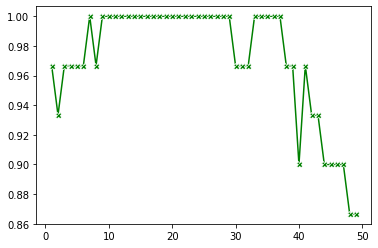

In [38]:
sns.lineplot(np.arange(1,50),knn_list,marker='X',color='green')